In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\ACER PC\Dropbox\My PC (LAPTOP-83BUHU5P)\Downloads\Shopping Mall Customer Segmentation Data .csv")
df

,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76
...,...,...,...,...,...
15074,a0504768-a85f-4930-ac24-55bc8e4fec9e,29,Female,97723,30
15075,a08c4e0e-d1fe-48e7-9366-aab11ae409cd,22,Male,73361,74
15076,0e87c25a-268c-401a-8ba1-7111dcde6f1a,18,Female,112337,48
15077,5f388cbe-3373-4e16-b743-38f508f2249f,26,Female,94312,5


In [4]:
n = df.copy()

In [5]:
n.describe()

,Age,Annual Income,Spending Score
count,15079.000000,15079.000000,15079.000000
mean,54.191591,109742.880562,50.591617
std,21.119207,52249.425866,28.726977
min,18.000000,20022.000000,1.000000
25%,36.000000,64141.000000,26.000000
50%,54.000000,109190.000000,51.000000
75%,72.000000,155008.000000,75.000000
max,90.000000,199974.000000,100.000000


### QUESTIONS TO PRACTICE

### What is the distribution of gender within the dataset?

In [6]:
n.columns

Index(['Customer ID', 'Age', 'Gender', 'Annual Income', 'Spending Score'], dtype='object')

In [7]:
n.dtypes

Customer ID       object
Age                int64
Gender            object
Annual Income      int64
Spending Score     int64
dtype: object

Gender
Female    109902.799572
Male      109585.298749
Name: Annual Income, dtype: float64


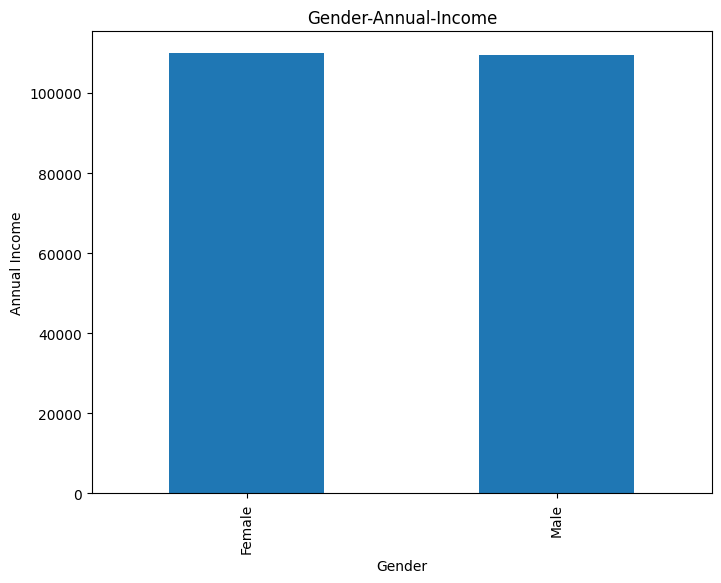

In [8]:
n1 = n.groupby('Gender')['Annual Income'].mean()
print(n1)
plt.figure(figsize = (8,6))
n1.plot(kind = 'bar')
plt.title("Gender-Annual-Income")
plt.xlabel("Gender")
plt.ylabel('Annual Income')
plt.tight_layout
plt.show()

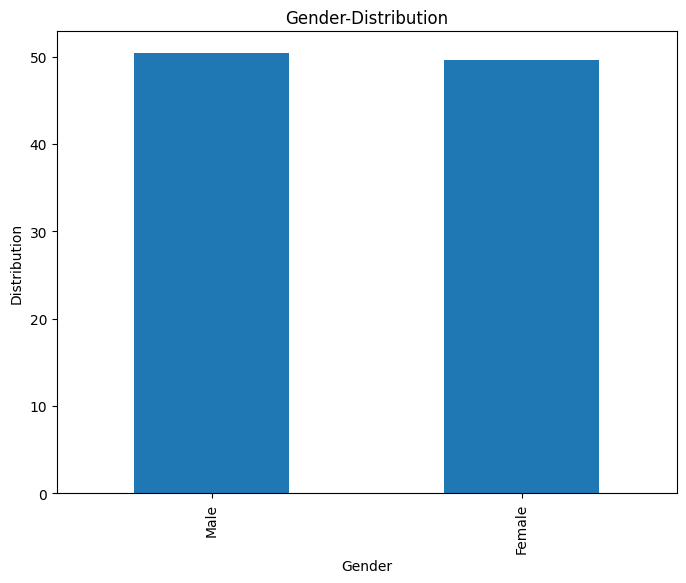

In [9]:
gender_distribution = n["Gender"].value_counts(normalize=True) * 100
plt.figure(figsize = (8,6))
gender_distribution.plot(kind = 'bar')
plt.title("Gender-Distribution")
plt.xlabel("Gender")
plt.ylabel('Distribution')
plt.tight_layout
plt.show()

In [10]:
gender_distribution

Gender
Male      50.368062
Female    49.631938
Name: proportion, dtype: float64

### Are there any outliers in income and spending score?

### OUTLIERS FOR INCOME 

In [11]:
n.columns

Index(['Customer ID', 'Age', 'Gender', 'Annual Income', 'Spending Score'], dtype='object')

In [12]:
q1 = n['Annual Income'].quantile(0.25)
print("q1",q1)
q3 = n['Annual Income'].quantile(0.75)
print("q3",q3)
iqr = q3-q1
iqrmax = q3 + (0.5)*iqr
iqrmin = q1 - (0.5)*iqr
print("iqr",iqr)
print("iqrmax",iqrmax)
print("iqrmin",iqrmin)
print(n['Annual Income'].max())
print(n['Annual Income'].min())

q1 64141.0
q3 155008.0
iqr 90867.0
iqrmax 200441.5
iqrmin 18707.5
199974
20022


In [13]:
n[(n['Annual Income']>iqrmax) | (n["Annual Income"]<iqrmin)]

,Customer ID,Age,Gender,Annual Income,Spending Score


###### there is no outlier in annual income

### for spending score

In [14]:
q1 = n['Spending Score'].quantile(0.25)
print("q1",q1)
q3 = n['Spending Score'].quantile(0.75)
print("q3",q3)
iqr = q3-q1
iqrmax = q3 + (1.5)*iqr
iqrmin = q1 - (1.5)*iqr
print("iqr",iqr)
print("iqrmax",iqrmax)
print("iqrmin",iqrmin)
print(n['Spending Score'].max())
print(n['Spending Score'].min())
print(n['Spending Score'].mean())

q1 26.0
q3 75.0
iqr 49.0
iqrmax 148.5
iqrmin -47.5
100
1
50.59161748126534


In [15]:
n[(n['Spending Score']>iqrmax) | (n["Spending Score"]<iqrmin)]

,Customer ID,Age,Gender,Annual Income,Spending Score


In [16]:
n.count()

Customer ID       15079
Age               15079
Gender            15079
Annual Income     15079
Spending Score    15079
dtype: int64

In [17]:
ncorr = n['Spending Score'].corr(n['Annual Income'])
ncorr

0.0032341193354843457

In [18]:
ncorr = n['Annual Income'].corr(n['Spending Score'])
ncorr

0.0032341193354843457

### How many customers fall into specific income ranges?

In [19]:
n['Annual Income'].min()

20022

In [20]:
n['Annual Income'].max()

199974

In [21]:
def income(Annual Income):
    if Annual Income< 30000:
        return "Under 30,000"
    elif Annual Income< 50000:
        return "Under 50,000"
    elif Annual Income < 75000:
        return "Under 75,000"
    elif Annual Income < 100000:
        return "Under 1 lakh"
    elif Annual Income < 200000:
        return "Under 2 lakh"
    else:
        return "Invalid number"
n['Income Range'] = df['Annual Income'].apply(income)
    

SyntaxError: invalid syntax (415982019.py, line 1)

In [22]:
n.describe()

,Age,Annual Income,Spending Score
count,15079.000000,15079.000000,15079.000000
mean,54.191591,109742.880562,50.591617
std,21.119207,52249.425866,28.726977
min,18.000000,20022.000000,1.000000
25%,36.000000,64141.000000,26.000000
50%,54.000000,109190.000000,51.000000
75%,72.000000,155008.000000,75.000000
max,90.000000,199974.000000,100.000000
